# Sesión 09: Análisis de regresión: interacción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_excel('data/b01_casas.xlsx', usecols=['preciomillones', 'construccion', 'tipo'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tipo            154 non-null    int64  
 1   preciomillones  154 non-null    float64
 2   construccion    154 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.7 KB


In [4]:
df.head()

,tipo,preciomillones,construccion
0,1,4.2,130
1,0,5.1,280
2,1,5.5,112
3,1,5.7,112
4,1,5.8,112


In [5]:
# Definir las variables dependiente e independientes
y = df['preciomillones']
X = df[['construccion', 'tipo']]
# Añadir una constante al conjunto de datos
X = sm.add_constant(X)
# Crear el modelo de regresión lineal con término de interacción
modelo = sm.OLS(y, X)
# Ajustar el modelo a los datos
resultado = modelo.fit()
# Mostrar los resultados del modelo
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preciomillones   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     549.4
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           5.03e-70
Time:                        19:17:19   Log-Likelihood:                -417.54
No. Observations:                 154   AIC:                             841.1
Df Residuals:                     151   BIC:                             850.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.4889      1.152     -2.160      0.032      -4.766      -0.212
construccion     0.0491      0.002     25.220      0.000       0.045       0.053
tipo            -0.9565      0.762     -1.256      0.211      -2.461       0.548
==============================================================================
Omnibus:                        9.248   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               20.043
Skew:                           0.015   Prob(JB):                     4.44e-05
Kurtosis:                       4.767   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='construccion', ylabel='preciomillones'>

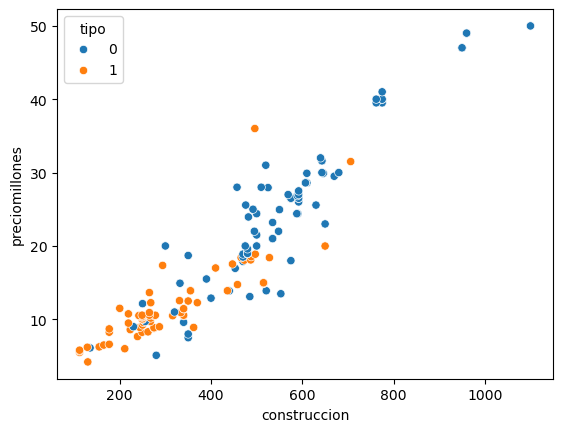

In [6]:
sns.scatterplot(data=df, x='construccion', y='preciomillones', hue='tipo')

In [7]:
# Calcular el término de interacción
df['construccion_tipo'] = df['construccion'] * df['tipo']
df.head(3)

,tipo,preciomillones,construccion,construccion_tipo
0,1,4.2,130,130
1,0,5.1,280,0
2,1,5.5,112,112


In [8]:
# Definir las variables dependiente e independientes
y = df['preciomillones']
X = df[['construccion', 'tipo', 'construccion_tipo']]
# Añadir una constante al conjunto de datos
X = sm.add_constant(X)
# Crear el modelo de regresión lineal con término de interacción
modelo = sm.OLS(y, X)
# Ajustar el modelo a los datos
resultado = modelo.fit()
# Mostrar los resultados del modelo
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preciomillones   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     439.4
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           4.66e-74
Time:                        19:19:11   Log-Likelihood:                -404.63
No. Observations:                 154   AIC:                             817.3
Df Residuals:                     150   BIC:                             829.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.9878      1.256     -4.767      0.000      -8.470      -3.506
construccion          0.0554      0.002     25.626      0.000       0.051       0.060
tipo                  6.9494      1.666      4.171      0.000       3.657      10.242
construccion_tipo    -0.0204      0.004     -5.233      0.000      -0.028      -0.013
==============================================================================
Omnibus:                       38.848   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.848
Skew:                           0.752   Prob(JB):                     4.89e-43
Kurtosis:                       8.301   Cond. No.                     3.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretación**: El término de interacción indica cómo varía la relación entre la variable independiente y la dependiente de acuerdo a una tercera variable. En este caso, como el coeficiente del término de interacción es negativo significa que el efecto de los metros cuadrados en el precio de venta es menor para los departamentos (tipo=1) que para las casas (tipo=0). es decir, cada metro cuadrado adicional de construcción aumenta menos los precios de los departamentos que de las casas.

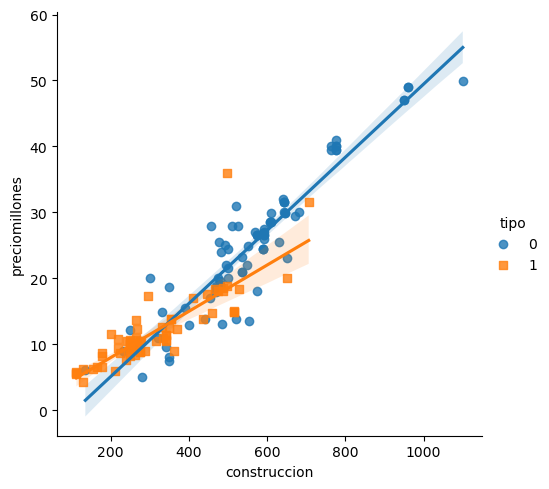

In [9]:
sns.lmplot(x='construccion', y='preciomillones', data=df, hue='tipo', markers=['o', 's']);

In [11]:
# Pronóstico
nuevos_valores = [1,500,1,500]
resultado.predict(nuevos_valores)

array([18.50629088])